<a href="https://colab.research.google.com/github/rachel1234561/DS2002F24/blob/main/Rachel_Universities_and_Stock_API_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using API Calls in Python with JSON and DataFrames - University Data Example
In this notebook, we will make API requests to the Hipolabs Universities API, parse the JSON response, and convert it into Pandas DataFrames for analysis and visualization.

### Step 1: Making the API Call to Fetch University Data

In [60]:
import requests
import json
import pandas as pd

# API endpoint for fetching universities
url = "http://universities.hipolabs.com/search?country=United%20States"

# Make the GET request
response = requests.get(url)

# Check the status code
if response.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")

API request successful!


### Step 2: Parsing the JSON Response

In [61]:
# Parse the JSON response
university_data = response.json()

# Pretty-print the first university
print(json.dumps(university_data[0], indent=2))

{
  "domains": [
    "marywood.edu"
  ],
  "alpha_two_code": "US",
  "web_pages": [
    "http://www.marywood.edu"
  ],
  "name": "Marywood University",
  "state-province": null,
  "country": "United States"
}


### Step 3: Converting the JSON Data to a DataFrame

In [62]:
# Convert JSON data to a DataFrame
df = pd.DataFrame(university_data)

# Display the first few rows of the DataFrame
print(df.head())
df

            domains alpha_two_code                     web_pages  \
0    [marywood.edu]             US     [http://www.marywood.edu]   
1  [lindenwood.edu]             US  [http://www.lindenwood.edu/]   
2    [sullivan.edu]             US       [https://sullivan.edu/]   
3        [fscj.edu]             US       [https://www.fscj.edu/]   
4      [xavier.edu]             US     [https://www.xavier.edu/]   

                                    name state-province        country  
0                    Marywood University           None  United States  
1                  Lindenwood University           None  United States  
2                    Sullivan University           None  United States  
3  Florida State College at Jacksonville           None  United States  
4                      Xavier University           None  United States  


,domains,alpha_two_code,web_pages,name,state-province,country
0,[marywood.edu],US,[http://www.marywood.edu],Marywood University,None,United States
1,[lindenwood.edu],US,[http://www.lindenwood.edu/],Lindenwood University,None,United States
2,[sullivan.edu],US,[https://sullivan.edu/],Sullivan University,None,United States
3,[fscj.edu],US,[https://www.fscj.edu/],Florida State College at Jacksonville,None,United States
4,[xavier.edu],US,[https://www.xavier.edu/],Xavier University,None,United States
...,...,...,...,...,...,...
2329,[vermontlaw.edu],US,[https://www.vermontlaw.edu/],Vermont Law School,None,United States
2330,[wnc.edu],US,[https://wnc.edu/],Western Nevada College,None,United States
2331,[westernu.edu],US,[https://www.westernu.edu/],Western University of Health Sciences,None,United States
2332,[stmarytx.edu],US,[https://www.stmarytx.edu/],St. Mary's University,Texas,United States


### Step 4: Basic Data Analysis

In [63]:
# Count the number of universities by state
state_counts = df['state-province'].value_counts()
print(state_counts)

state-province
Pennsylvania            31
NY                       9
California               5
Texas                    5
New York, NY             4
New York                 3
Florida                  3
North Carolina           3
Michigan                 3
Ohio                     3
Illinois                 2
CA                       2
Washington               2
GA                       2
TX                       2
ND                       1
Missouri                 1
Maine                    1
MA                       1
Georgia                  1
MI                       1
New Hampshire            1
Virginia                 1
South Carolina           1
IN                       1
Colorado                 1
Kansas                   1
Indiana                  1
VA                       1
Iowa                     1
NV                       1
Utah                     1
Salt Lake City, Utah     1
Name: count, dtype: int64


### Step 5: Data Visualization

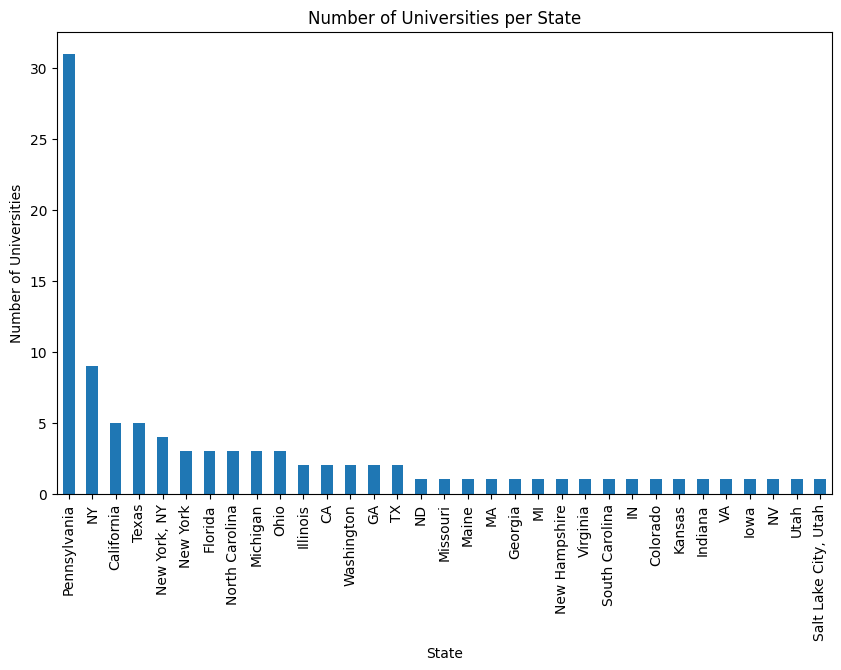

In [64]:
import matplotlib.pyplot as plt

# Plot the number of universities per state
state_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Universities per State")
plt.xlabel("State")
plt.ylabel("Number of Universities")
plt.show()

### Step 6: Extending to Multiple Countries

In [65]:
countries = ["United States", "Canada", "Australia", "United Kingdom"]
university_list = []

for country in countries:
    response = requests.get(f"http://universities.hipolabs.com/search?country={country}")
    data = response.json()

    for uni in data:
        uni['country'] = country
        university_list.append(uni)

# Convert to DataFrame
df_universities = pd.DataFrame(university_list)

# Display the first few rows
print(df_universities.head())

            domains alpha_two_code                     web_pages  \
0    [marywood.edu]             US     [http://www.marywood.edu]   
1  [lindenwood.edu]             US  [http://www.lindenwood.edu/]   
2    [sullivan.edu]             US       [https://sullivan.edu/]   
3        [fscj.edu]             US       [https://www.fscj.edu/]   
4      [xavier.edu]             US     [https://www.xavier.edu/]   

                                    name state-province        country  
0                    Marywood University           None  United States  
1                  Lindenwood University           None  United States  
2                    Sullivan University           None  United States  
3  Florida State College at Jacksonville           None  United States  
4                      Xavier University           None  United States  


### Step 7: Visualizing University Counts by Country

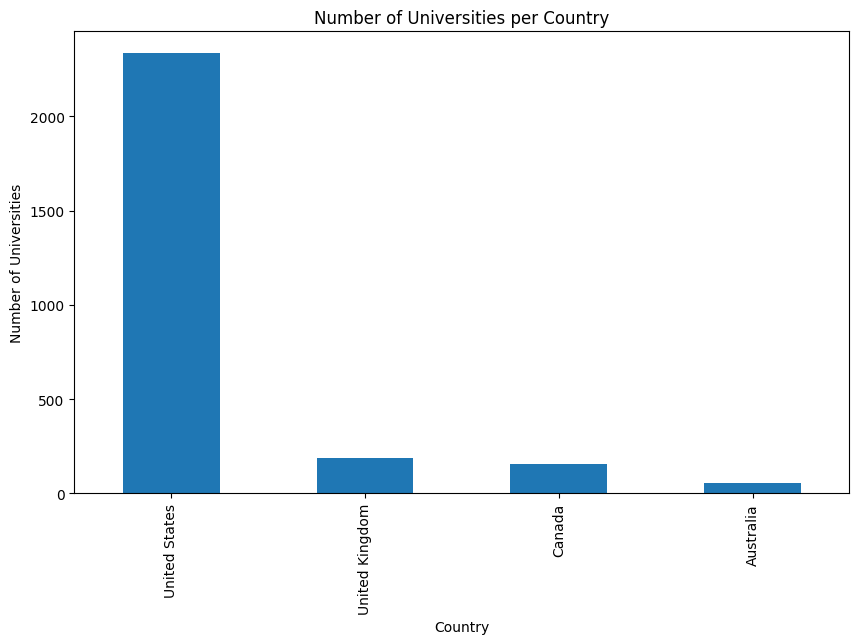

In [66]:
# Count the number of universities per country
country_counts = df_universities['country'].value_counts()

# Plot the data
country_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Universities per Country")
plt.xlabel("Country")
plt.ylabel("Number of Universities")
plt.show()

###Step 8: Customizing the Workshop

You can experiment further by:



*   Fetching data for specific regions.
*   Analyzing other attributes such as university domains.
*   Creating visualizations to compare universities in different regions.



In [87]:
regions_to_filter = ["Texas", "Ohio"]

# Filter the DataFrame to include only universities in the specified regions
filtered_df = df_universities[df_universities['state-province'].isin(regions_to_filter)]

# Display the filtered DataFrame
print(filtered_df)

              domains alpha_two_code                    web_pages  \
16        [utrgv.edu]             US     [https://www.utrgv.edu/]   
697         [osu.edu]             US       [https://www.osu.edu/]   
1099     [utexas.edu]             US    [https://www.utexas.edu/]   
1103       [utsa.edu]             US      [https://www.utsa.edu/]   
2006  [schreiner.edu]             US     [https://schreiner.edu/]   
2157   [defiance.edu]             US   [http://www.defiance.edu/]   
2299    [capital.edu]             US   [https://www.capital.edu/]   
2332   [stmarytx.edu]             US  [https://www.stmarytx.edu/]   

                                              name state-province  \
16    The University of Texas at Rio Grande Valley          Texas   
697               Ohio State University - Columbus           Ohio   
1099             The University of Texas at Austin          Texas   
1103        The University of Texas at San Antonio          Texas   
2006                          Sch

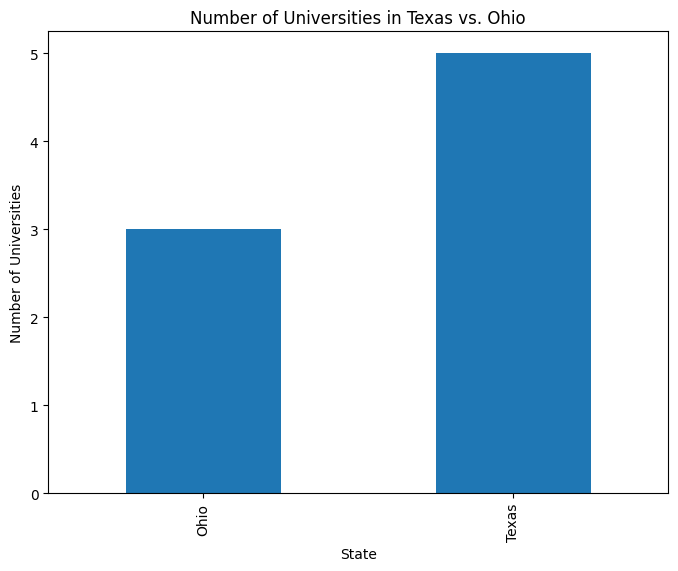

In [88]:
import matplotlib.pyplot as plt
# Group
state_counts = filtered_df.groupby('state-province')['name'].count()

# Create a bar chart
state_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Number of Universities in Texas vs. Ohio')
plt.xlabel('State')
plt.ylabel('Number of Universities')
plt.show()


For the followig you will need to get your API key from  https://financeapi.net/
Examine the demo page and sample data to be returned

In [67]:
import json
import pandas as pd
import json
import requests

In [72]:
#get stock from the user
stock=input()

aapl


In [73]:
print("The Stock we will research is:" + stock)

The Stock we will research is:aapl


In [74]:

apikey="YVr1FRtdHD5Rqv3lwBHI46lf3nKcF9C3dO5Jfl8b"

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"quoteResponse":{"result":[{"language":"en-US","region":"US","quoteType":"EQUITY","typeDisp":"Equity","quoteSourceName":"Nasdaq Real Time Price","triggerable":true,"customPriceAlertConfidence":"HIGH","currency":"USD","exchange":"NMS","shortName":"Apple Inc.","longName":"Apple Inc.","messageBoardId":"finmb_24937","exchangeTimezoneName":"America/New_York","exchangeTimezoneShortName":"EDT","gmtOffSetMilliseconds":-14400000,"market":"us_market","esgPopulated":false,"regularMarketChangePercent":0.3445681,"regularMarketPrice":227.15,"regularMarketChange":0.7799988,"regularMarketTime":1727369831,"regularMarketDayHigh":228.5,"regularMarketDayRange":"225.41 - 228.5","regularMarketDayLow":225.41,"regularMarketVolume":17372604,"regularMarketPreviousClose":226.37,"bid":226.89,"ask":227.49,"bidSize":1,"askSize":1,"fullExchangeName":"NasdaqGS","financialCurrency":"USD","regularMarketOpen":227.3,"averageDailyVolume3Month":55790612,"averageDailyVolume10Day":76429910,"fiftyTwoWeekLowChange":63.069992,

In [75]:
#print the company name and price
stock_json = response.json()
print(stock_json['quoteResponse']['result'][0]["longName"] + " Price:$" + str(stock_json['quoteResponse']['result'][0]["regularMarketPrice"]))

Apple Inc. Price:$227.15


Ask the user for a list of stocks and pass that answer back to the user


In [85]:
# AI prompt: print the company name and price for all companies entered above

stock_list = input("Enter a comma-separated list of stocks: ").split(',')
apikey = "YVr1FRtdHD5Rqv3lwBHI46lf3nKcF9C3dO5Jfl8b"
url = "https://yfapi.net/v6/finance/quote"

for stock in stock_list:
    querystring = {"symbols": stock.strip()}
    headers = {'x-api-key': apikey}
    response = requests.request("GET", url, headers=headers, params=querystring)

    try:
        stock_json = response.json()
        company_name = stock_json['quoteResponse']['result'][0]["longName"]
        price = stock_json['quoteResponse']['result'][0]["regularMarketPrice"]
        print(f"{company_name} Price: ${price}")
    except (KeyError, IndexError):
        print(f"Could not retrieve information for {stock}.")


Enter a comma-separated list of stocks: AAPL,BTC-USD
Apple Inc. Price: $227.19
Bitcoin USD Price: $65353.52
